In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [16]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [17]:
digits.feature_names[:10]

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1']

In [18]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [19]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

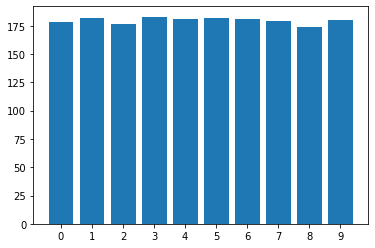

In [20]:
plt.bar(np.unique(y, return_counts=True)[0], np.unique(y, return_counts=True)[1])
plt.xticks(range(10))
plt.show()

In [21]:
X.shape
X[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

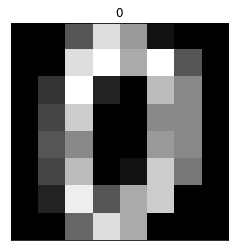

In [22]:
img_idx = 0
img = X[img_idx].reshape(8,8)
plt.imshow(img, cmap='gray')

plt.title(y[img_idx])
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [24]:
y = np.where(y==9,1,0)

In [25]:
y_pct = np.unique(y, return_counts=True)
y_pct

(array([0, 1]), array([1617,  180], dtype=int64))

In [26]:
y_pct[1]/y.size

array([0.89983306, 0.10016694])

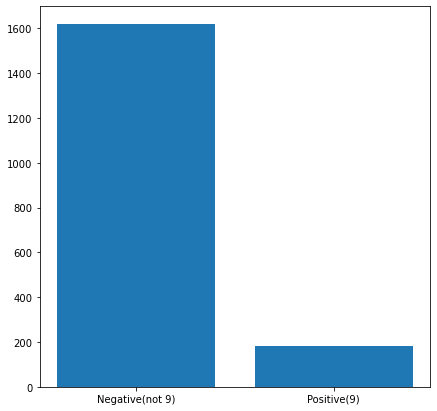

In [27]:
plt.figure(figsize=(7,7))
plt.bar(y_pct[0], y_pct[1])
plt.xticks([0,1], labels=['Negative(not 9)', 'Positive(9)'])
plt.show()

--------------------------------

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [29]:
digits = load_digits()
X = digits.data
y = digits.target

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=0,
                                                   stratify=digits.target)

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rf.fit(X_train,y_train)
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [31]:
tree.predict_proba(X_test)[:5]

array([[0.00269542, 0.1509434 , 0.13881402, 0.17520216, 0.14824798,
        0.0148248 , 0.00404313, 0.05795148, 0.17924528, 0.12803235],
       [0.        , 0.02325581, 0.03488372, 0.        , 0.12790698,
        0.01744186, 0.79069767, 0.00581395, 0.        , 0.        ],
       [0.00269542, 0.1509434 , 0.13881402, 0.17520216, 0.14824798,
        0.0148248 , 0.00404313, 0.05795148, 0.17924528, 0.12803235],
       [0.        , 0.        , 0.00934579, 0.00934579, 0.04672897,
        0.        , 0.        , 0.87850467, 0.        , 0.05607477],
       [0.        , 0.        , 0.00934579, 0.00934579, 0.04672897,
        0.        , 0.        , 0.87850467, 0.        , 0.05607477]])

In [32]:
tree.predict(X_test)[:5]

array([8, 6, 8, 7, 7])

In [33]:
from sklearn.metrics import precision_recall_curve
pos_proba = tree.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
print(precisions.shape, recalls.shape, thresholds.shape)

ValueError: multiclass format is not supported